# Loan Approval / Modeling

## Neural Network

In [1]:
import pandas as pd
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/loan-processed.csv")
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.070489,0.000000,0.172214,0.74359,1.0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001003,0.054830,0.036192,0.172214,0.74359,1.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,0.035250,0.000000,0.082489,0.74359,1.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,0.030093,0.056592,0.160637,0.74359,1.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,LP001008,0.072356,0.000000,0.191027,0.74359,1.0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Feature Selection

In [3]:
df.drop(columns=["Loan_ID"], inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Train / Test Split

In [4]:
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
X_train.shape

(491, 20)

In [6]:
X_test.shape

(123, 20)

## Neural Network

In [7]:
# Fitting model based on the train data
model = MLPClassifier(random_state=42,
                      max_iter=1000, hidden_layer_sizes=(10,),
                      n_iter_no_change=100,
                      early_stopping=True,
                      verbose=True).fit(X_train, y_train)

Iteration 1, loss = 0.67810580
Validation score: 0.620000
Iteration 2, loss = 0.67388725
Validation score: 0.620000
Iteration 3, loss = 0.66984980
Validation score: 0.620000
Iteration 4, loss = 0.66625912
Validation score: 0.620000
Iteration 5, loss = 0.66303761
Validation score: 0.640000
Iteration 6, loss = 0.65989442
Validation score: 0.660000
Iteration 7, loss = 0.65736001
Validation score: 0.660000
Iteration 8, loss = 0.65482643
Validation score: 0.660000
Iteration 9, loss = 0.65247698
Validation score: 0.660000
Iteration 10, loss = 0.65036226
Validation score: 0.680000
Iteration 11, loss = 0.64851318
Validation score: 0.680000
Iteration 12, loss = 0.64658474
Validation score: 0.680000
Iteration 13, loss = 0.64486524
Validation score: 0.680000
Iteration 14, loss = 0.64325677
Validation score: 0.680000
Iteration 15, loss = 0.64181771
Validation score: 0.680000
Iteration 16, loss = 0.64039440
Validation score: 0.680000
Iteration 17, loss = 0.63901162
Validation score: 0.680000
Iterat

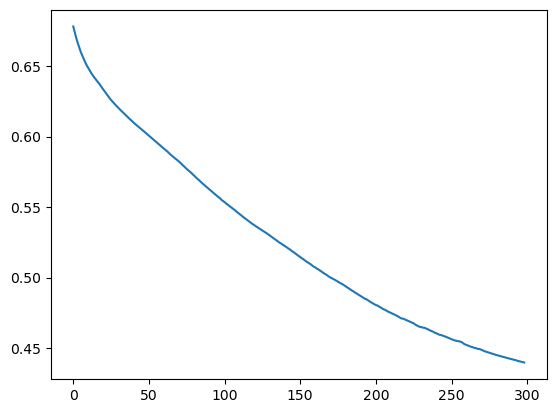

In [8]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

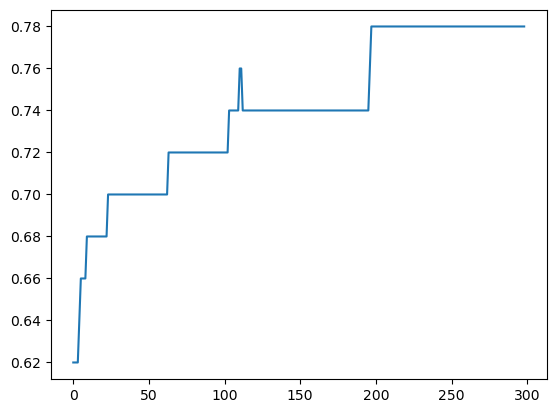

In [9]:
validation_scores = model.validation_scores_
plt.plot(validation_scores)
plt.show()

In [10]:
model.score(X_train, y_train)

0.7983706720977597

In [11]:
# checking the score
# the result is between 0 and 1: 1 means 100% accurate
model.score(X_test, y_test)

0.7560975609756098

In [12]:
model.coefs_

[array([[-0.1599598 ,  0.59600156,  0.17167505, -0.05615316, -0.4140871 ,
         -0.46569279,  0.03274084,  0.16719156,  0.14345333,  0.03412946],
        [-0.43497265,  0.13785467,  0.27860444, -0.34258153, -0.33909641,
         -0.18156969,  0.05340666, -0.07749306,  0.20021612, -0.11901825],
        [ 0.05433241, -0.3656574 , -0.19896675, -0.26173755, -0.13551271,
          0.22435394,  0.14409416, -0.12040806,  0.11702376, -0.50236871],
        [ 0.12693338, -0.25336803, -0.40135614,  0.29650337,  0.46014231,
          0.22565946,  0.09462703, -0.3192077 ,  0.15940445, -0.06578116],
        [-0.14288605,  0.25134985, -0.39977928,  0.14237605,  0.21212991,
          0.04442321, -0.87253147,  0.53632271,  0.55109395,  0.19938205],
        [ 0.50948703,  0.42151218,  0.0826315 ,  0.20034846,  0.24185408,
          0.40150609, -0.36113525, -0.04642804, -0.23898601, -0.14788759],
        [-0.14365134, -0.27124788,  0.27367394, -0.19333193, -0.19858045,
         -0.07740582, -0.0623201

## Testing

In [13]:
sample_record = X_test.sample(3)
sample_record

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
452,0.046976,0.041592,0.202605,0.743590,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
155,0.492876,0.000000,0.855282,0.358974,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
437,0.025516,0.027000,0.172214,0.743590,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
result = model.predict(sample_record)
result

array([0, 0, 1], dtype=int64)

## Evaluation

### Confusion Matrix

In [15]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm

array([[14, 29],
       [ 1, 79]], dtype=int64)

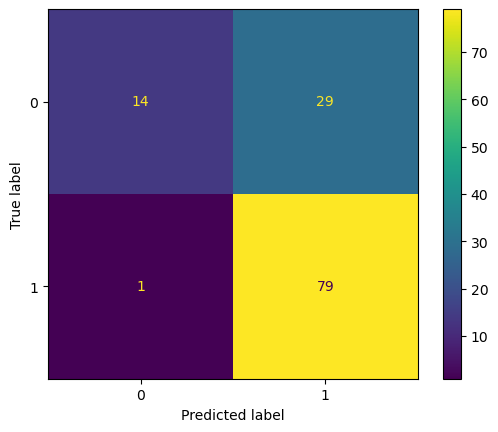

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Error Type I & II

### Precision & Recall

### F1 Score

In [17]:
f1 = f1_score(y_test, predictions)
f1

0.8404255319148937

## Saving Model

In [20]:
model.feature_names_in_

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [18]:
# saving the encoder
pickle.dump(model, open("../object/model.pkl", "wb"))